In [1]:
# Beat tracking example
from __future__ import print_function
import librosa
import librosa.display

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import IPython.display as ipd

In [4]:
import numpy as np
import pandas as pd

In [6]:
X = np.load('../data/processed/mel/train_noisy_mel128_len600.npy')

In [7]:
train = pd.read_csv('../data/processed/train_noisy.csv',sep=';')

In [8]:
train.columns

Index(['fname', 'labels', 'Accelerating_and_revving_and_vroom', 'Accordion',
       'Acoustic_guitar', 'Applause', 'Bark', 'Bass_drum', 'Bass_guitar',
       'Bathtub_(filling_or_washing)', 'Bicycle_bell',
       'Burping_and_eructation', 'Bus', 'Buzz', 'Car_passing_by', 'Cheering',
       'Chewing_and_mastication', 'Child_speech_and_kid_speaking',
       'Chink_and_clink', 'Chirp_and_tweet', 'Church_bell', 'Clapping',
       'Computer_keyboard', 'Crackle', 'Cricket', 'Crowd',
       'Cupboard_open_or_close', 'Cutlery_and_silverware',
       'Dishes_and_pots_and_pans', 'Drawer_open_or_close', 'Drip',
       'Electric_guitar', 'Fart', 'Female_singing',
       'Female_speech_and_woman_speaking', 'Fill_(with_liquid)',
       'Finger_snapping', 'Frying_(food)', 'Gasp', 'Glockenspiel', 'Gong',
       'Gurgling', 'Harmonica', 'Hi-hat', 'Hiss', 'Keys_jangling', 'Knock',
       'Male_singing', 'Male_speech_and_man_speaking', 'Marimba_and_xylophone',
       'Mechanical_fan', 'Meow', 'Microwave_

In [9]:
train[train.labels == 'Buzz'].head()

,fname,labels,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),...,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing),num_labels,path
41,00752915.wav,Buzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,../data/raw/train_noisy/00752915.wav
240,02e81e02.wav,Buzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,../data/raw/train_noisy/02e81e02.wav
278,035dfc7a.wav,Buzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,../data/raw/train_noisy/035dfc7a.wav
343,044129f3.wav,Buzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,../data/raw/train_noisy/044129f3.wav
495,065b6607.wav,Buzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,../data/raw/train_noisy/065b6607.wav


In [10]:
len(train[train.num_labels == 1])

16566

In [20]:
X = X[:, : ,:400]

In [21]:
X.shape

(19815, 128, 400)

In [29]:
idx = 41

In [30]:
filename = train.iloc[idx,-1]

In [31]:
y, sr = librosa.load(filename)

In [32]:
Ydb = X[idx]

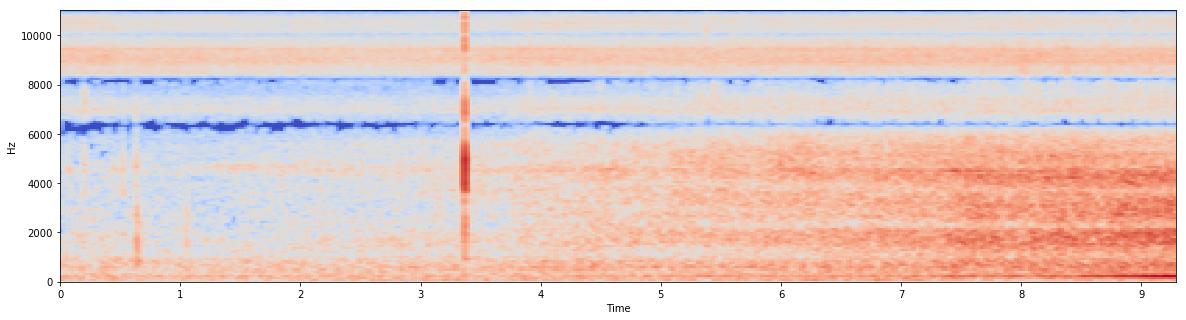

In [33]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

In [17]:
ipd.Audio(filename) # load a local WAV file